<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-01-09 15:18:18
-------------------
qualified stocks: 89
with latest results: 84
still star stocks: 44
-------------------
Initial Investment:  1.04 C
CY Investment:  1.17 C
Reserve:  0.00
Current:  1.18 C
-------------------
Today PnL: -57.39 K (-0.48%)
Current PnL: -10.29 L (-8.8%)
CY Booked + Current PnL: 1.21 L (1.03%)
-------------------
Total profit:  4.54 L
Total loss:  -14.84 L
-------------------
Total Booked + Current PnL: 14.32 L (13.78%)
Total Booked PnL: 24.61 L (23.68%)
Curr Year Booked PnL: 11.50 L (9.71%)
Prev Year Booked PnL: 13.11 L (12.62%)
Est FTT:  1.87 C
Est FTT PnL: 68.60 L (57.9%)
-------------------
Est LTT:  2.48 C
Est LTT PnL: 1.30 C (109.37%)
Deployed:  1.04 C
Current:  1.18 C
CAGR/XIRR %: 11.36%


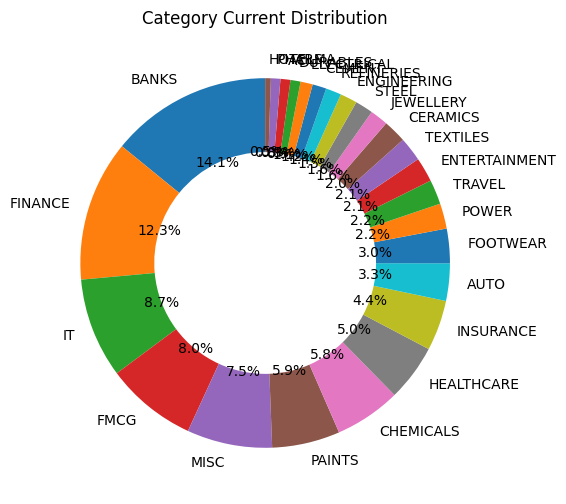

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
15,BAYERCROP,4346.57,6805.00,20.38,H-SC,47.19,89359.0,19814.0,19525.0,2.05,...,21.85,56.56,21.0,1.01,0.75,14.40,X40N,NTT,SC,CHEMICALS
12,BANKBARODA,195.74,283.00,-26.20,M-LC,14.61,91146.0,13829.0,20635.0,-0.94,...,22.64,44.58,19.0,0.67,0.77,6.65,XR,NTT,LC,BANKS
48,LALPATHLAB,2630.06,3545.00,-12.96,H-SC,66.29,132194.0,16471.0,23782.0,0.33,...,17.99,34.79,19.0,0.69,1.12,50.28,X40N,NTT,SC,HEALTHCARE
72,SIS,477.00,528.00,63.66,M-SC,16.85,58965.0,-22125.0,30797.0,-1.22,...,52.23,10.69,-21.0,-0.72,0.50,0.00,X40N,NTT,SC,MISC
55,NESTLEIND,2228.06,2925.00,-17.65,X-LC,82.02,110586.0,1411.0,32745.0,1.66,...,29.61,31.28,NaN,0.04,0.93,4.97,X40,BTT,LC,FMCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,REPCOHOME,527.76,880.00,-12.79,H-SC,8.99,150626.0,-44117.0,174094.0,-0.63,...,115.58,66.74,-42.0,-0.25,1.27,9.35,XY24,NTT,SC,FINANCE
65,SAIL,130.64,228.00,45.80,M-MC,5.62,186148.0,-38814.0,206475.0,-1.51,...,110.92,74.53,6.0,-0.19,1.57,0.91,XY24,BTT,MC,STEEL
60,RBLBANK,230.61,388.00,-41.68,M-SC,46.07,160416.0,-73884.0,233790.0,-2.33,...,145.74,68.25,-50.0,-0.32,1.35,3.79,XY24,NTT,SC,BANKS
11,BANDHANBNK,217.54,400.00,-46.85,H-SC,4.49,162981.0,-75660.0,275813.0,-2.08,...,169.23,83.87,-25.0,-0.27,1.38,0.00,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
55,NESTLEIND,2228.06,2925.00,-17.65,X-LC,82.02,110586.0,1411.0,32745.0,1.66,...,29.61,31.28,NaN,0.04,0.93,4.97,X40,BTT,LC,FMCG
20,CERA,9059.90,10420.45,-7.87,X-SC,38.20,71398.0,-19201.0,32807.0,-0.67,...,45.95,15.02,-51.0,-0.59,0.60,8.40,X40N,ATH,SC,CERAMICS
17,BRITANNIA,4845.40,6446.05,0.51,X-LC,89.89,108341.0,1742.0,33467.0,1.33,...,30.89,33.03,239.0,0.05,0.91,6.86,AR,ATH,LC,FMCG
80,TCS,4164.02,4998.00,1.07,X-LC,33.71,160228.0,-2169.0,34689.0,1.99,...,21.65,20.03,12.0,-0.06,1.35,12.45,X40,BTT,LC,IT
78,TATAELXSI,7332.28,9000.00,-17.49,X-MC,13.48,90169.0,-12483.0,35833.0,-0.51,...,39.74,22.74,-5.0,-0.35,0.76,1.04,X40N,NTT,MC,IT
57,PIDILITIND,2482.94,3576.00,-13.14,X-LC,53.93,171306.0,27295.0,36094.0,1.57,...,21.07,44.02,12.0,0.76,1.45,18.25,X40,BTT,LC,CHEMICALS
41,INFY,1436.24,2275.00,7.00,X-LC,76.40,199254.0,49885.0,37340.0,-0.89,...,18.74,58.40,37.0,1.34,1.68,39.26,X40,BTT,LC,IT
62,RELIANCE,1284.26,1590.07,-5.37,X-LC,68.54,160640.0,-3745.0,42891.0,-0.83,...,26.70,23.81,72.0,-0.09,1.36,4.12,X40,ATH,LC,REFINERIES
50,LTIM,5664.39,7262.39,10.65,X-LC,37.08,174849.0,4917.0,43030.0,-0.91,...,24.61,28.21,0.0,0.11,1.48,28.44,X200,ATH,LC,IT
23,COLPAL,2837.00,3808.06,17.88,X-MC,91.01,144308.0,2458.0,46092.0,3.46,...,31.94,34.23,-54.0,0.05,1.22,22.57,X40,ATH,MC,FMCG


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XY24') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
44,JIOFIN,320.24,387.0,-13.31,M-LC,6.74,142741.0,-15458.0,48432.0,-3.23,...,33.93,20.85,65.0,-0.32,1.20,20.52,XY24,BTT,LC,FINANCE
29,GICRE,335.06,583.0,17.77,M-MC,98.88,202855.0,56434.0,51911.0,3.92,...,25.59,74.00,137.0,1.09,1.71,56.80,XY24,BTT,MC,INSURANCE
24,DABUR,518.36,735.0,-7.39,X-MC,88.76,132728.0,546.0,54697.0,1.31,...,41.21,41.79,-3.0,0.01,1.12,6.11,XY24,BTT,MC,FMCG
79,TATAMOTORS,798.82,1065.0,-55.19,M-LC,70.79,159941.0,-3817.0,58378.0,-1.86,...,36.50,33.32,-70.0,-0.07,1.35,8.03,XY24,NTT,LC,AUTO
85,UNIONBANK,123.87,163.0,-17.66,M-MC,1.12,126343.0,-14497.0,58990.0,-1.50,...,46.69,31.59,-20.0,-0.25,1.07,2.66,XY24,NTT,MC,BANKS
19,CAMPUS,294.86,393.0,-7.29,M-SC,64.04,162307.0,-5468.0,61303.0,-3.08,...,37.77,33.28,18.0,-0.09,1.37,32.98,XY24,NTT,SC,FOOTWEAR
53,MEDANTA,1022.60,1486.0,-3.90,X-SC,34.83,162784.0,7349.0,63095.0,-0.79,...,38.76,45.32,30.0,0.12,1.37,10.76,XY24,NTT,SC,HEALTHCARE
56,NHPC,82.08,115.0,179.19,M-MC,30.34,134090.0,-6923.0,63478.0,-1.19,...,47.34,40.11,-85.0,-0.11,1.13,15.27,XY24,NTT,MC,POWER
16,BERGEPAINT,558.54,680.0,-34.88,H-MC,73.03,148499.0,-28558.0,67062.0,1.41,...,45.16,21.75,-20.0,-0.43,1.25,6.22,XY24,NTT,MC,PAINTS
71,SHALBY,261.39,327.0,57.01,M-SC,48.31,158177.0,-22966.0,68427.0,-1.25,...,43.26,25.10,-25.0,-0.34,1.34,8.39,XY24,NTT,SC,HEALTHCARE


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
12,BANKBARODA,195.74,283.00,-26.20,M-LC,14.61,91146.0,13829.0,20635.0,-0.94,...,22.64,44.58,19.0,0.67,0.77,6.65,XR,NTT,LC,BANKS
17,BRITANNIA,4845.40,6446.05,0.51,X-LC,89.89,108341.0,1742.0,33467.0,1.33,...,30.89,33.03,239.0,0.05,0.91,6.86,AR,ATH,LC,FMCG
82,TRIDENT,37.35,48.00,63.93,M-SC,2.25,79386.0,-12868.0,39177.0,-1.20,...,49.35,28.51,-11.0,-0.33,0.67,2.82,XR,NTT,SC,TEXTILES
49,LAOPALA,369.40,464.00,-16.11,M-SC,57.30,86282.0,-14564.0,40389.0,-0.53,...,46.81,25.61,-41.0,-0.36,0.73,7.52,AR,NTT,SC,CERAMICS
52,MASFIN,326.60,401.09,-30.40,H-SC,49.44,77175.0,-20805.0,43149.0,-1.78,...,55.91,22.81,-74.0,-0.48,0.65,0.00,XR,ATH,SC,FINANCE
40,INDUSINDBK,1354.50,1800.00,-34.59,M-MC,77.53,55920.0,-21286.0,46682.0,0.00,...,83.48,32.89,-21.0,-0.46,0.47,5.55,XR,NTT,MC,BANKS
26,DMART,3504.64,5112.00,-25.17,X-LC,75.28,141085.0,11413.0,48054.0,-0.78,...,34.06,45.86,35.0,0.24,1.19,11.88,AR,NTT,LC,FMCG
38,IEX,133.39,219.00,-6.31,H-SC,59.55,193352.0,44089.0,51702.0,-0.63,...,26.74,64.18,28.0,0.85,1.63,31.09,XR,NTT,SC,MISC
25,DEN,52.79,75.00,-23.40,L-SC,55.06,67536.0,-16928.0,52462.0,-3.05,...,77.68,42.07,-18.0,-0.32,0.57,4.69,AR,NTT,SC,ENTERTAINMENT
18,BSOFT,628.85,844.81,-5.87,M-SC,21.35,94850.0,-15199.0,52993.0,-0.38,...,55.87,34.34,-22.0,-0.29,0.80,0.00,XR,ATH,SC,IT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.44
1,20,33.80
2,30,47.23


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,40.40
X40,21.35
X40N,14.76
XR,14.44
AR,6.15
X200,1.48
SR,1.42


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
M-SC,28.27
X-LC,21.36
H-SC,17.79
M-MC,11.06
X-SC,5.72
X-MC,4.17
M-LC,3.32
H-MC,2.70
L-SC,2.67


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
X40       X-LC          17.78
XY24      M-SC          15.21
          M-MC           9.01
X40N      H-SC           5.93
XY24      H-SC           5.78
X40N      M-SC           5.52
XR        H-SC           4.80
          M-SC           4.43
XY24      H-MC           2.70
          M-LC           2.55
XR        X-SC           2.21
AR        X-LC           2.10
X40N      X-MC           1.83
          X-SC           1.48
X200      X-LC           1.48
XY24      X-SC           1.37
X40       H-LC           1.36
AR        M-SC           1.36
          H-SC           1.28
X40       X-MC           1.22
XR        M-MC           1.21
XY24      X-MC           1.12
          L-SC           1.08
XR        L-SC           1.02
X40       M-SC           0.99
AR        M-MC           0.84
XR        M-LC           0.77
SR        M-SC           0.76
          X-SC           0.66
AR        L-SC           0.57
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.12,-14.14,68.18
FINANCE,12.32,-11.88,59.00
IT,8.74,-7.51,61.54
FMCG,7.96,-0.51,38.12
MISC,7.46,-2.55,40.55
PAINTS,5.94,-16.86,51.44
CHEMICALS,5.79,-5.62,72.26
HEALTHCARE,4.96,7.00,39.02
INSURANCE,4.41,7.39,42.57


In [13]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2871813.0
XR,1303901.0
X40N,985385.0
X40,853074.0
AR,625378.0
SR,177194.0
X200,43030.0


In [14]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M-SC,2163797.0
H-SC,1650151.0
M-MC,881536.0
X-LC,799743.0
X-SC,431738.0
L-SC,280978.0
X-MC,185696.0
H-MC,148021.0
M-LC,127445.0


In [15]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1000957.0
          M-MC           676720.0
X40       X-LC           675192.0
XY24      H-SC           634963.0
X40N      M-SC           473086.0
XR        M-SC           450940.0
          H-SC           375090.0
X40N      H-SC           348372.0
AR        H-SC           291726.0
XR        X-SC           171608.0
          L-SC           157781.0
XY24      H-MC           148021.0
XR        M-MC           127847.0
AR        M-SC           122700.0
SR        X-SC           118015.0
XY24      M-LC           106810.0
X40N      X-MC            84907.0
AR        X-LC            81521.0
X40N      X-SC            79020.0
AR        M-MC            76969.0
X40       H-LC            74855.0
XY24      L-SC            70735.0
          X-SC            63095.0
SR        M-SC            59179.0
X40       M-SC            56935.0
XY24      X-MC            54697.0
AR        L-SC            52462.0
X40       X-MC            46092.0
X200      X-LC            43030.0
XR        M-LC            20635.0
Name: FTT Amt, dtype: float64

In [16]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,28
H-SC,16
X-LC,14
M-MC,10
X-SC,6
X-MC,4
L-SC,4
M-LC,3
H-MC,2
